# Law of the Integrated Logarithm

The law of the iterated logarithm provides a family of bounds all of the same order such that with probability one only finitely many partial sums of a sequence of independent and identically distributed random variables exceed some members of the family, while for others infinitely many do so. 

https://doi.org/10.1073/pnas.63.2.289


These bounds exist for an more rapidly increasing number of situations than those that do not.

In [1]:
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import pandas as pd

In [2]:
def sym_nonlog(x, exp):
    '''
    Raise to a symmetric log power, so negative values are considered.
    
    x: value
    exp: exponent value, less than one simulates logarythmic values
    
    '''
    return np.sign(x)*abs(x)**exp


def round_sig_fig(x, sig):
    """
    Round a value x to sig significant figures.
    """
    return int(round(x, sig-int(np.floor(np.log10(abs(x))))-1))

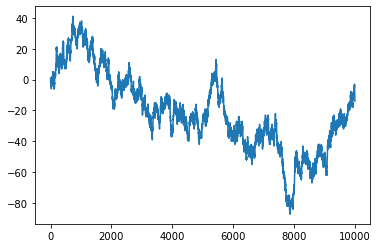

<ipython-input-3-1f03131256c0>:14: RuntimeWarning: divide by zero encountered in log
  'sqrt((2 log log n)/n)':np.sqrt((2*np.log(np.log(n)))/n),
<ipython-input-3-1f03131256c0>:14: RuntimeWarning: invalid value encountered in sqrt
  'sqrt((2 log log n)/n)':np.sqrt((2*np.log(np.log(n)))/n),
<ipython-input-3-1f03131256c0>:15: RuntimeWarning: divide by zero encountered in log
  '-sqrt((2 log log n)/n)':-np.sqrt((2*np.log(np.log(n)))/n),
<ipython-input-3-1f03131256c0>:15: RuntimeWarning: invalid value encountered in sqrt
  '-sqrt((2 log log n)/n)':-np.sqrt((2*np.log(np.log(n)))/n),


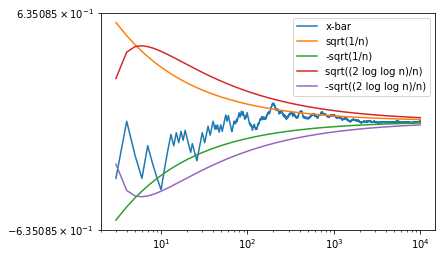

In [3]:
# Individual trial:
N = 10**4
B = 2 * np.random.binomial(1, 0.5, N) - 1       # N independent +1/-1 each of them with probability 1/2
B = np.cumsum(B)                                # random walk
plt.plot(B)
plt.show()


n = np.arange(N)+1
df = pd.DataFrame(index=n,
                  data={'x-bar':B/n,
                        'sqrt(1/n)':np.sqrt(1/n),
                        '-sqrt(1/n)':-np.sqrt(1/n),
                        'sqrt((2 log log n)/n)':np.sqrt((2*np.log(np.log(n)))/n),
                        '-sqrt((2 log log n)/n)':-np.sqrt((2*np.log(np.log(n)))/n),
                        }).dropna()  

df.iloc[:100000,:].plot()
plt.xscale('log')
plt.yscale('symlog')
plt.show()

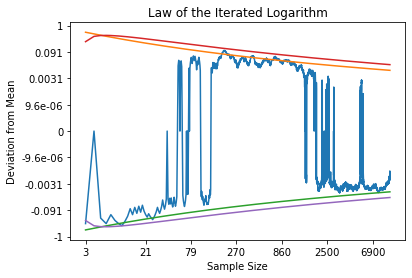

In [4]:
# Plot akin to figure in https://en.wikipedia.org/wiki/Law_of_the_iterated_logarithm

# Scale according to dimensions
df_sym_nonlog = df.applymap(lambda x: sym_nonlog(x,.12))
df_sym_nonlog['x_val'] = df_sym_nonlog.index.values**0.06

fig, ax = plt.subplots()
df_sym_nonlog.plot(ax=ax, legend=False, x='x_val')

# Set xtick labels and locations:
xticks_label = [round_sig_fig(x, 2) for x in ax.get_xticks()**(1/0.06)]
xticks_label = [x for x in xticks_label if x in df_sym_nonlog.index]
xticks_label[0] = min(df_sym_nonlog.index)
xticks_loc = df_sym_nonlog.loc[xticks_label, 'x_val'].values

ax.xaxis.set_major_locator(mticker.MaxNLocator(len(xticks_label)))
ax.xaxis.set_major_locator(mticker.FixedLocator(xticks_loc))
ax.set_xticklabels(xticks_label)

# Set ytick labels and locations
yticks_label = np.sign(ax.get_yticks())* abs(ax.get_yticks())**(1/0.12)
yticks_loc = ax.get_yticks()

ax.yaxis.set_major_locator(mticker.MaxNLocator(len(yticks_label)))
ax.yaxis.set_major_locator(mticker.FixedLocator(yticks_loc))
ax.set_yticklabels(['{:1.2g}'.format(x) for x in yticks_label])


plt.title('Law of the Iterated Logarithm')
plt.xlabel('Sample Size')
plt.ylabel('Deviation from Mean')

plt.show()

### Repeat runs to check

Run iteratively to demonstrate that many stay within the bounds, but not all ('almost surely'). As the number scales to infinity, the boundary holds.

In [5]:
# We can rerun this many (_many_) times, and the number of times the bounds hold
# is far greater than the number of times they do not. 
n_bernoulli = 10**6
n_exp = 20
n = np.arange(n_bernoulli)+1
trials = {'trial{x:03.0f}'.format(x=x): np.cumsum(2*np.random.binomial(1, 0.5, n_bernoulli)-1)/n
          for x in range(n_exp)}      # N independent +1/-1 each of them with probability 1/2
                                      # random walk
bounds = {'sqrt(1/n)':np.sqrt(1/n),
          '-sqrt(1/n)':-np.sqrt(1/n),
          'sqrt((2 log log n)/n)':np.sqrt((2*np.log(np.log(n)))/n),
          '-sqrt((2 log log n)/n)':-np.sqrt((2*np.log(np.log(n)))/n),
          }

trials.update(bounds)

df_exps =  pd.DataFrame(index=np.arange(n_bernoulli)+1,
                        data=trials).dropna()

<ipython-input-5-fd642a3536c4>:11: RuntimeWarning: divide by zero encountered in log
  'sqrt((2 log log n)/n)':np.sqrt((2*np.log(np.log(n)))/n),
<ipython-input-5-fd642a3536c4>:11: RuntimeWarning: invalid value encountered in sqrt
  'sqrt((2 log log n)/n)':np.sqrt((2*np.log(np.log(n)))/n),
<ipython-input-5-fd642a3536c4>:12: RuntimeWarning: divide by zero encountered in log
  '-sqrt((2 log log n)/n)':-np.sqrt((2*np.log(np.log(n)))/n),
<ipython-input-5-fd642a3536c4>:12: RuntimeWarning: invalid value encountered in sqrt
  '-sqrt((2 log log n)/n)':-np.sqrt((2*np.log(np.log(n)))/n),


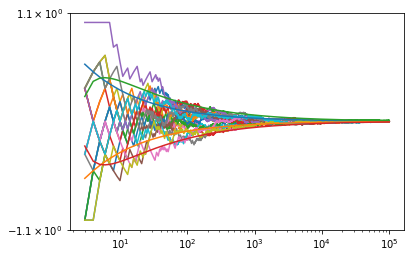

In [6]:
# Plot the law of iterated logarithms - an 'almost surely' staying within the bounds
df_exps.iloc[:100000,:].plot(legend=False)
plt.xscale('log')
plt.yscale('symlog')
plt.show()

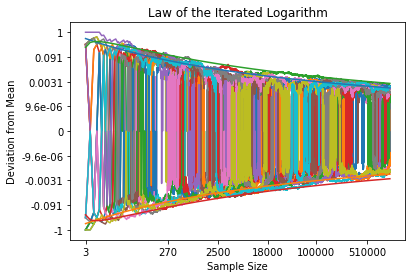

In [7]:
# Plot akin to figure in https://en.wikipedia.org/wiki/Law_of_the_iterated_logarithm

# Scale according to dimensions
df_sym_nonlog = df_exps.applymap(lambda x: sym_nonlog(x,.12))
df_sym_nonlog['x_val'] = df_sym_nonlog.index.values**0.06

fig, ax = plt.subplots()
df_sym_nonlog.plot(ax=ax, legend=False, x='x_val')

# Set xtick labels and locations:
xticks_label = [round_sig_fig(x, 2) for x in ax.get_xticks()**(1/0.06)]
xticks_label = [x for x in xticks_label if x in df_sym_nonlog.index]
xticks_label[0] = min(df_sym_nonlog.index)
xticks_loc = df_sym_nonlog.loc[xticks_label, 'x_val'].values

ax.xaxis.set_major_locator(mticker.MaxNLocator(len(xticks_label)))
ax.xaxis.set_major_locator(mticker.FixedLocator(xticks_loc))
ax.set_xticklabels(xticks_label)

# Set ytick labels and locations
yticks_label = np.sign(ax.get_yticks())* abs(ax.get_yticks())**(1/0.12)
yticks_loc = ax.get_yticks()

ax.yaxis.set_major_locator(mticker.MaxNLocator(len(yticks_label)))
ax.yaxis.set_major_locator(mticker.FixedLocator(yticks_loc))
ax.set_yticklabels(['{:1.2g}'.format(x) for x in yticks_label])


plt.title('Law of the Iterated Logarithm')
plt.xlabel('Sample Size')
plt.ylabel('Deviation from Mean')

plt.show()

# Optimizely Bounds

In [8]:
def optim_var_obs_diff(nA, nB, xA, xB):
    """
    2x the standard error of the mean. Pekelis, et. Al refer this as the 'estimate
    of the variance of the observed difference of conversion rates.'
    
    Modified from the paper such that different n 'visitors' can be used between treatment 
    and control
    
    Where:
    nA is the number of trials for experiment 1
    xA is the number of successes for experiment 1
    nB is the number of trials for experiment 2 (i.e. control)
    xB is the number of successes for experiment 2 (i.e. control)
    
    Optimizely whitepaper available at https://www.optimizely.com/insights/stats-engine-whitepaper/
    """
    rateA = xA/nA
    rateB = xB/nB
    return 2*(rateA*(1-rateA)/nA + rateB*(1-rateB)/nB)


def optim_bounds(nA, nB, xA, xB, alpha_level=0.05, tau=1):
    """
    Boundary conditions for a test being significant for a given alpha level.
    
    Optimizely whitepaper available at https://www.optimizely.com/insights/stats-engine-whitepaper/
    
    
    Alpha is long-term probability of making a type I error across a large number of
    repeats of the experiment.
    
    Tau is a tunable parameter that represents a Bayesian prior distribution of the difference between 
    treatment and control groups. While more details are in the white paper, the relation is reported to 
    come from the integration of the average likelihood ratio of the true effect against a null effect against
    a prior distribution on the true effect. 
    
    """
    
    return  np.sqrt(2*(np.log(1/alpha)-np.log(var_obs_diff(nA, nB, xA, xB)/(var_obs_diff(nA, nB, xA, xB)+tau))) * 
            ((var_obs_diff(nA, nB, xA, xB)*(var_obs_diff(nA, nB, xA, xB)+tau))/tau))


In [9]:
# Simulate optimizely here